<a href="https://colab.research.google.com/github/sean-halpin/chess_website/blob/models_init/models/Chess_Eval_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Download

In [ ]:
# https://database.lichess.org/standard/lichess_db_standard_rated_2013-01.pgn.zst

In [ ]:
!pip install zstandard

In [6]:
import requests
import zstandard
import io

lichess = "https://database.lichess.org/standard/"
dbfile = "lichess_db_standard_rated_2017-01.pgn.zst"
url = lichess + dbfile
compressed_file_path = dbfile
output_path = dbfile.replace(".zst","")

# Download the Zstandard compressed file
response = requests.get(url)
if response.status_code == 200:
    with open(compressed_file_path, 'wb') as file:
        file.write(response.content)
    print(f"File downloaded successfully to {compressed_file_path}")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

# Extract the Zstandard compressed file
with open(compressed_file_path, 'rb') as compressed_file:
    dctx = zstandard.ZstdDecompressor()
    with dctx.stream_reader(compressed_file) as reader:
        with open(output_path, 'wb') as output:
            output.write(reader.read())

print(f"File extracted successfully to {output_path}")


File extracted successfully to lichess_db_standard_rated_2017-01.pgn


# Data Exploration

In [7]:
!ls

lichess_db_standard_rated_2017-01.pgn  lichess_db_standard_rated_2017-01.pgn.zst  sample_data


In [8]:
!cat lichess_db_standard_rated_2017-01.pgn | grep '\[%eval' | wc -l

1235035


In [9]:
!cat lichess_db_standard_rated_2017-01.pgn | grep '\[%eval' | head -n5

1. e4 { [%eval 0.14] } 1... e5 { [%eval 0.16] } 2. Nf3 { [%eval 0.24] } 2... Nc6 { [%eval 0.31] } 3. Bc4 { [%eval 0.15] } 3... Nd4?! { [%eval 0.94] } 4. c3 { [%eval 0.57] } 4... Nxf3+ { [%eval 0.53] } 5. Qxf3 { [%eval 0.52] } 5... Qf6 { [%eval 0.55] } 6. Qe2 { [%eval 0.5] } 6... c6 { [%eval 0.67] } 7. d3 { [%eval 0.37] } 7... Bc5 { [%eval 0.47] } 8. O-O { [%eval 0.16] } 8... Ne7 { [%eval 0.24] } 9. Kh1 { [%eval 0.16] } 9... Ng6 { [%eval 0.17] } 10. g3?! { [%eval -0.71] } 10... O-O?! { [%eval 0.09] } 11. f4?! { [%eval -0.75] } 11... exf4?! { [%eval -0.19] } 12. gxf4?! { [%eval -0.72] } 12... d5 { [%eval -0.64] } 13. exd5? { [%eval -2.46] } 13... cxd5?! { [%eval -1.54] } 14. Bxd5 { [%eval -1.62] } 14... Be6? { [%eval 0.0] } 15. Bxe6 { [%eval -0.03] } 15... fxe6 { [%eval 0.0] } 16. d4 { [%eval 0.0] } 16... Bd6 { [%eval 0.0] } 17. Be3 { [%eval -0.17] } 17... Bxf4 { [%eval -0.08] } 18. Nd2 { [%eval -0.09] } 18... Qf5 { [%eval -0.07] } 19. Nc4?? { [%eval -3.79] } 19... Qd5+ { [%eval -3.64] }

In [10]:
!cat lichess_db_standard_rated_2017-01.pgn | grep '\[%eval' > lichess.pgn.eval

In [ ]:
!pip install python-chess

# Data Visualisation

In [ ]:
import chess.pgn
import re

pgn_text = """
1. e4 { [%eval 0.2] [%eval 0.2] } 1... e6 { [%eval 0.13] } 2. Bc4 { [%eval -0.31] } 2... d5 { [%eval -0.28] } 3. exd5 { [%eval -0.37] } 3... exd5 { [%eval -0.31] } 4. Bb3 { [%eval -0.33] } 4... Nf6 { [%eval -0.35] } 5. d4 { [%eval -0.34] } 5... Be7 { [%eval 0.0] } 6. Nf3 { [%eval 0.0] } 6... O-O { [%eval -0.08] } 7. Bg5 { [%eval -0.19] } 7... h6 { [%eval -0.29] } 8. Bxf6 { [%eval -0.36] } 8... Bxf6 { [%eval -0.37] } 9. O-O { [%eval -0.36] } 9... c6 { [%eval -0.12] } 10. Re1 { [%eval -0.17] } 10... Bf5 { [%eval -0.04] } 11. c4?! { [%eval -0.67] } 11... dxc4 { [%eval -0.5] } 12. Bxc4 { [%eval -0.77] } 12... Nd7?! { [%eval -0.1] } 13. Nc3 { [%eval 0.0] } 13... Nb6 { [%eval 0.0] } 14. b3?! { [%eval -0.76] } 14... Nxc4 { [%eval -0.49] } 15. bxc4 { [%eval -0.65] } 15... Qa5 { [%eval -0.55] } 16. Rc1 { [%eval -0.79] } 16... Rad8 { [%eval -0.78] } 17. d5?? { [%eval -5.41] } 17... Bxc3 { [%eval -5.42] } 18. Re5? { [%eval -7.61] } 18... Bxe5 { [%eval -7.78] } 19. Nxe5 { [%eval -7.72] } 19... cxd5 { [%eval -7.81] } 20. Qe1? { [%eval -9.29] } 20... Be6?? { [%eval 3.71] } 21. Rd1?? { [%eval -12.34] } 21... dxc4 { [%eval -12.71] } 22. Rxd8?! { [%eval #-1] } 22... Rxd8?! { [%eval -13.06] } 23. Qc3?! { [%eval #-2] } 23... Qxc3?! { [%eval #-4] } 24. g3 { [%eval #-3] } 24... Rd1+?! { [%eval #-4] } 25. Kg2 { [%eval #-4] } 25... Qe1?! { [%eval #-4] } 26. Kf3 { [%eval #-3] } 26... Qxe5 { [%eval #-2] } 27. Kg2 { [%eval #-2] } 27... Bd5+?! { [%eval #-2] } 28. Kh3 { [%eval #-1] } 28... Qh5# 0-1
"""

game = chess.pgn.read_game(io.StringIO(pgn_text))

board = game.board()
for node in list(game.mainline()):
    print()
    print(node.move)
    # print(node)
    print(node.comment)
    pattern = r"\[%eval\s+([#])*([\d.-]+)\]"
    match = re.search(pattern, node.comment)
    if match:
        print((match.group(1) if match.group(1) is not None else ""), match.group(2))
    else:
        print("No '%eval' found in the text.")
    board.push(node.move)
    print(board)
    checkMate = board.is_checkmate()
    print("Checkmate?", checkMate)
    i=0
    for square in chess.SQUARES:
      piece = board.piece_at(square)
      print(f"Square {chess.square_name(square)}: {piece}: {(board.piece_at(square).piece_type * (1 if board.piece_at(square).color else -1)) if piece is not None else 0}")


In [13]:
abs(float('-2.0'))

2.0

In [19]:
bound = 30

In [20]:
def bound_value(value):
    return min(max(value, -bound), bound)

# Data Preparation

In [40]:
import pandas as pd
rows_data = []
columns = []
for square in chess.SQUARES:
  piece = board.piece_at(square)
  columns.append(chess.square_name(square))
columns.append("eval")

i=0
with open('lichess.pgn.eval', 'r') as file:
    for pgn_text in file:
      # print(pgn_text)
      game = chess.pgn.read_game(io.StringIO(pgn_text))
      board = game.board()
      for node in list(game.mainline()):
          row_data = [(((board.piece_at(square).piece_type * (1 if board.piece_at(square).color else -1))) if board.piece_at(square) is not None else 0) for square in chess.SQUARES]
          pattern = r"\[%eval\s+([#])*([\d.-]+)\]"
          match = re.search(pattern, node.comment)
          if match:
            if match.group(1) is None:
              eval = bound_value(float(f"{match.group(2)}"))
              check_in = 0
            else:
              eval = 0
              if float(match.group(2)) > 0 and float(match.group(2)) <= bound:
                check_in = (bound * 2) - (float(match.group(2))*2)
              elif float(match.group(2)) < 0 and float(match.group(2)) >= -bound:
                check_in = (-bound * 2) - (float(match.group(2))*2)
              else:
                check_in = 0
              eval = check_in

          whitePlays = board.turn
          board.push(node.move)
          if board.is_checkmate():
            eval += ((bound * 4) * (-1 if whitePlays else 1))
          row_data.append(eval)
          rows_data.append(row_data)
          # move next
      i+=1
      if i % 1_000 == 0:
        print(i)
      if i >= 15_000:
        break

df = pd.DataFrame(rows_data, columns=columns)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000


In [41]:
df

a1  b1  c1  d1  e1  f1  g1  h1  a2  b2  ...  h7  a8  b8  c8  d8  e8  \
0        4   2   3   5   6   3   2   4   1   1  ...  -1  -4  -2  -3  -5  -6   
1        4   2   3   5   6   3   2   4   1   1  ...  -1  -4  -2  -3  -5  -6   
2        4   2   3   5   6   3   2   4   1   1  ...  -1  -4  -2  -3  -5  -6   
3        4   2   3   5   6   3   0   4   1   1  ...  -1  -4  -2  -3  -5  -6   
4        4   2   3   5   6   3   0   4   1   1  ...  -1  -4   0  -3  -5  -6   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
948590   0   0   4   0   0   0   0   0   1   0  ...   0   0   0  -4  -4   0   
948591   0   0  -4   0   0   0   0   0   1   0  ...   0   0   0   0  -4   0   
948592   0   0  -4   0   0   0   0   0   1   0  ...   0   0   0   0  -4   0   
948593   0   0  -4   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   
948594   0   0  -4   0   0   0   0   0   1   0  ...   0   0   0   0   0   0   

        f8  g8  h8   eval  
0       -3  -2  -4   0.14  
1       -3  -2  -4   0.16  
2       -3  -2  -4   0.24  
3       -3  -2  -4   0.31  
4       -3  -2  -4   0.15  
...     ..  ..  ..    ...  
948590   0   0   0  -1.42  
948591   0   0   0  -2.89  
948592   0   0   0  -2.89  
948593   0   0   0 -11.86  
948594   0   0   0 -11.31  

[948595 rows x 65 columns]

In [42]:
value_ranges = df.describe().loc[['min', 'max']]
print("Value Ranges:")
print(value_ranges)

Value Ranges:
      a1   b1   c1   d1   e1   f1   g1   h1   a2   b2  ...   h7   a8   b8  \
min -6.0 -6.0 -6.0 -6.0 -6.0 -6.0 -6.0 -6.0 -6.0 -6.0  ... -6.0 -6.0 -6.0   
max  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  6.0  ...  6.0  6.0  6.0   

      c8   d8   e8   f8   g8   h8  eval  
min -6.0 -6.0 -6.0 -6.0 -6.0 -6.0 -42.0  
max  6.0  6.0  6.0  6.0  6.0  6.0  52.0  

[2 rows x 65 columns]


In [43]:
df.dtypes

a1        int64
b1        int64
c1        int64
d1        int64
e1        int64
         ...   
e8        int64
f8        int64
g8        int64
h8        int64
eval    float64
Length: 65, dtype: object

# Define Model

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class Net(nn.Module):
    def __init__(self, input_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc2z = nn.Linear(512, 512)
        self.fc2a = nn.Linear(512, 256)
        self.fc2b = nn.Linear(256, 128)
        self.fc3_eval = nn.Linear(128, 1)  # Output for 'eval'

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc2z(x))
        x = torch.relu(self.fc2a(x))
        x = torch.relu(self.fc2b(x))
        eval_output = self.fc3_eval(x)
        return eval_output


In [45]:
import gc
gc.collect()
torch.cuda.empty_cache()

# Prepare Train & Test Data

In [46]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

sampled_df = df.sample(n=750_000)

# Prepare the data
X = sampled_df.drop(columns=['eval']).values
y = sampled_df[['eval']].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors and move to GPU if available
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

# Define the model and move it to GPU if available
input_dim = X_train.shape[1]
model = Net(input_dim).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Train Model

In [47]:
# Train the model
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    eval_output = model(X_train_tensor)

    # Compute the loss for 'eval' output
    eval_loss = criterion(eval_output, y_train_tensor[:, 0].view(-1, 1))  # Assuming 'eval' is the first column
    loss = eval_loss

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

# Evaluate the model
model.eval()
with torch.no_grad():
    eval_output = model(X_test_tensor)

    # Compute the loss for 'eval' output
    eval_loss = criterion(eval_output, y_test_tensor[:, 0].view(-1, 1))  # Assuming 'eval' is the first column
    test_loss = eval_loss

    print(f'Test Loss: {test_loss.item()}')

Epoch 1/200, Loss: 99.84142303466797
Epoch 11/200, Loss: 82.16825866699219
Epoch 21/200, Loss: 82.65601348876953
Epoch 31/200, Loss: 75.39737701416016
Epoch 41/200, Loss: 61.87851333618164
Epoch 51/200, Loss: 56.122344970703125
Epoch 61/200, Loss: 54.34004592895508
Epoch 71/200, Loss: 53.51836013793945
Epoch 81/200, Loss: 52.92094802856445
Epoch 91/200, Loss: 52.4141731262207
Epoch 101/200, Loss: 52.04001235961914
Epoch 111/200, Loss: 51.708091735839844
Epoch 121/200, Loss: 51.404754638671875
Epoch 131/200, Loss: 51.096343994140625
Epoch 141/200, Loss: 51.01496124267578
Epoch 151/200, Loss: 50.753173828125
Epoch 161/200, Loss: 50.33212661743164
Epoch 171/200, Loss: 50.586856842041016
Epoch 181/200, Loss: 50.45042037963867
Epoch 191/200, Loss: 50.277793884277344
Test Loss: 52.215023040771484


# Play Chess with Model

In [48]:
def generate_pgn(board, moves):
    game = chess.pgn.Game()

    node = game
    for move in moves:
        node = node.add_variation(move)

    game.headers["Result"] = board.result()
    return str(game)

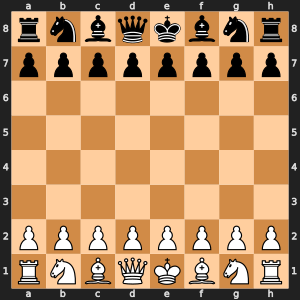

Move: 0: g1f3: -0.11136339604854584


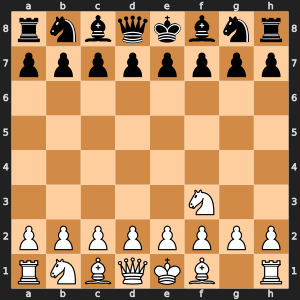

Move: 1: g8f6: 0.47193285822868347


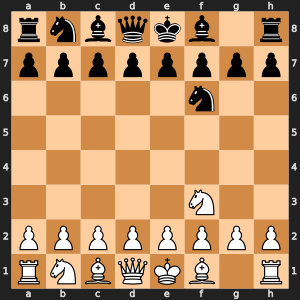

Move: 2: a2a4: 0.08067996799945831


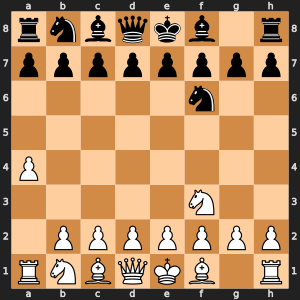

Move: 3: a7a5: 0.5160968899726868


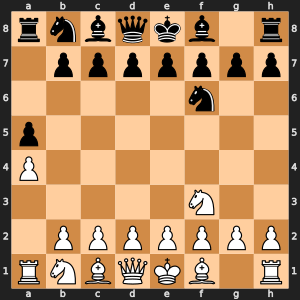

Move: 4: b1c3: 0.3300032913684845


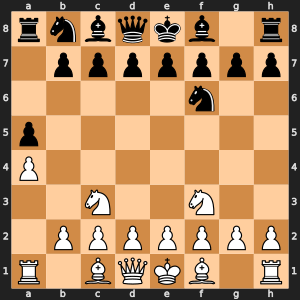

Move: 5: g7g6: 0.5738552212715149


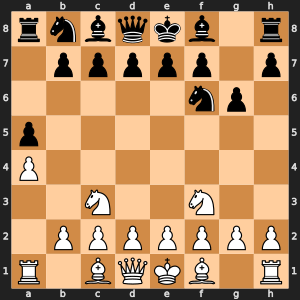

Move: 6: d2d3: 0.36725783348083496


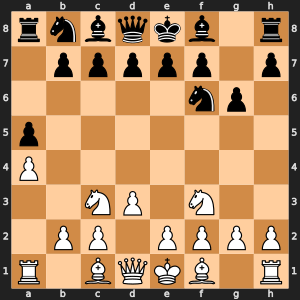

Move: 7: e7e6: 0.4849730432033539


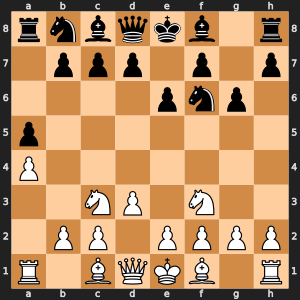

Move: 8: e2e3: 0.3994218111038208


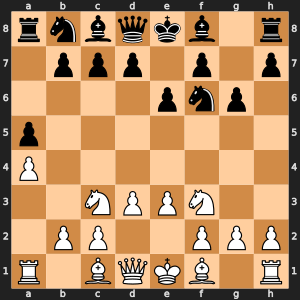

Move: 9: b8c6: 0.46719714999198914


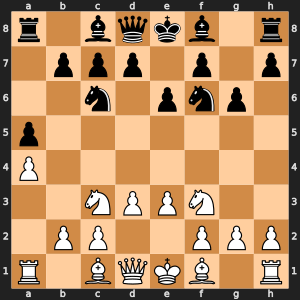

Move: 10: h2h4: 0.2710747718811035


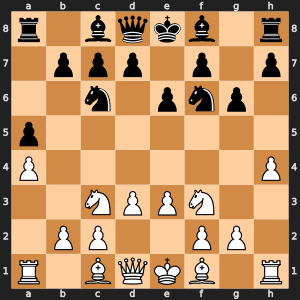

Move: 11: c6b4: -0.28487271070480347


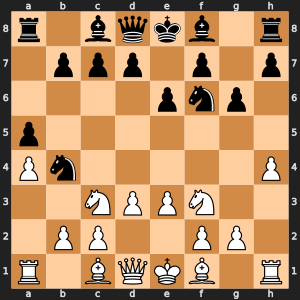

Move: 12: f3d4: -3.5041215419769287


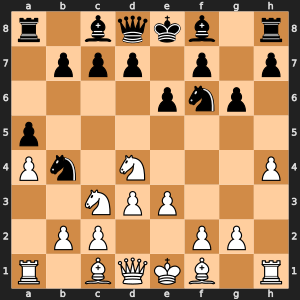

Move: 13: b4c2: 0.3042309582233429


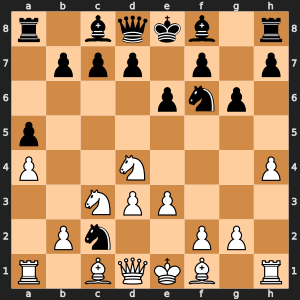

Move: 14: d4c2: 0.18501700460910797


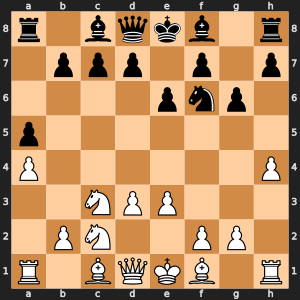

Move: 15: f8e7: 0.2935585379600525


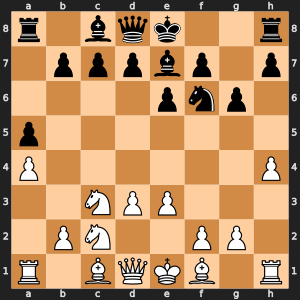

Move: 16: f2f3: -0.09317325055599213


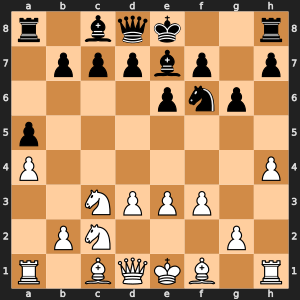

Move: 17: e8g8: 0.13270039856433868


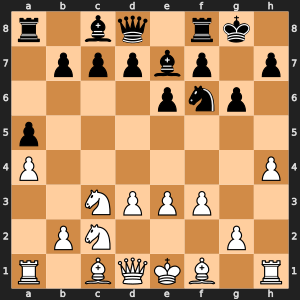

Move: 18: h1g1: -0.1763632744550705


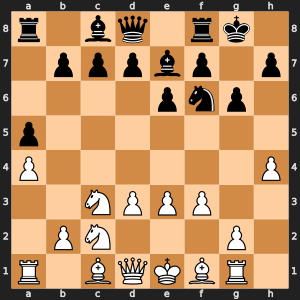

Move: 19: f8e8: 1.0752989053726196


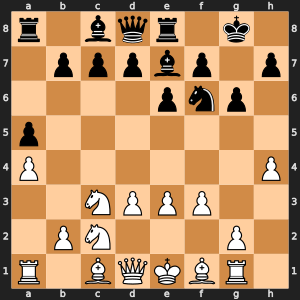

Move: 20: c2d4: -0.05844516679644585


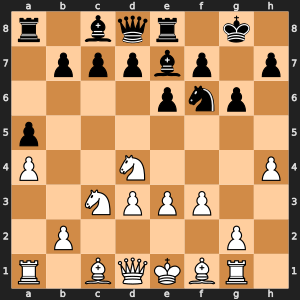

Move: 21: e6e5: 0.5412437319755554


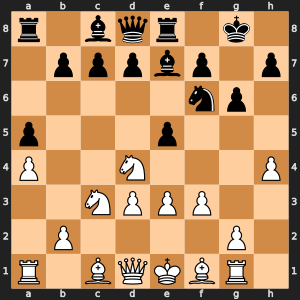

Move: 22: d4c2: -0.34466835856437683


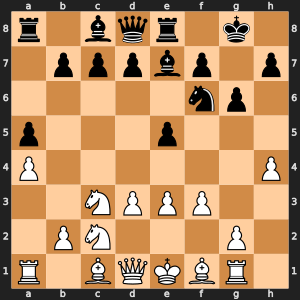

Move: 23: f6h5: 0.19291149079799652


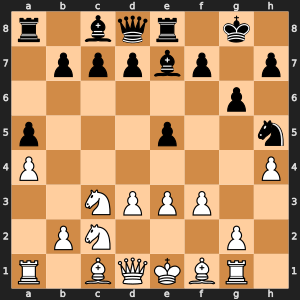

Move: 24: c3d5: -0.4161957800388336


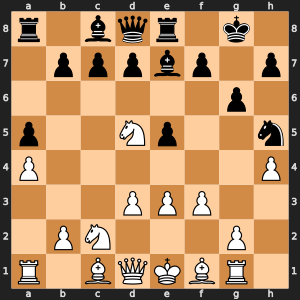

Move: 25: e7h4: -4.332169055938721


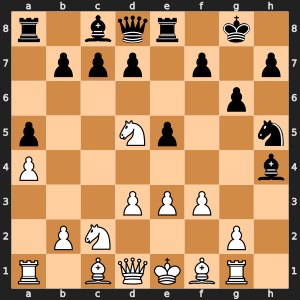

Move: 26: g2g3: -6.596536636352539


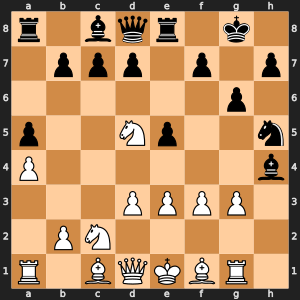

Move: 27: h4g3: -5.5326642990112305


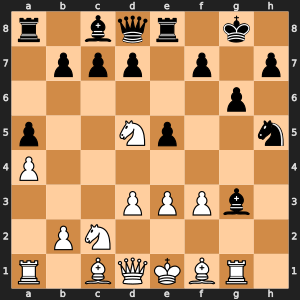

Move: 28: g1g3: -5.0633440017700195


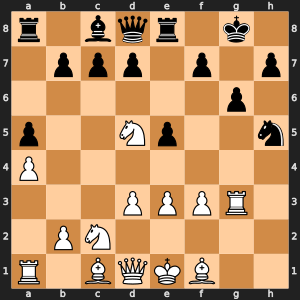

Move: 29: h5g3: -3.019831895828247


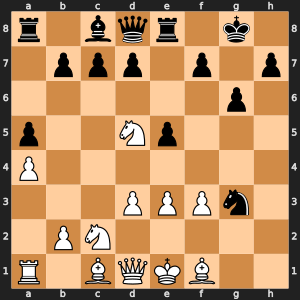

Move: 30: f1g2: -6.13041877746582


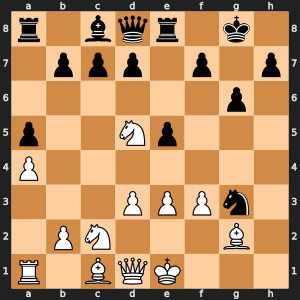

Move: 31: g3e4: -5.181121826171875


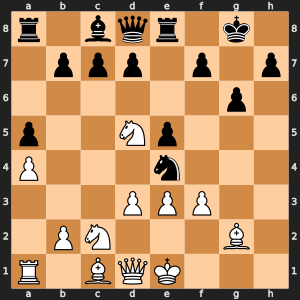

Move: 32: d5f6: -7.216587543487549


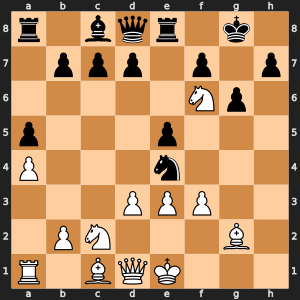

Move: 33: e4f6: -7.541049957275391


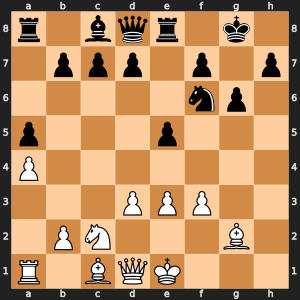

Move: 34: g2h1: -8.254890441894531


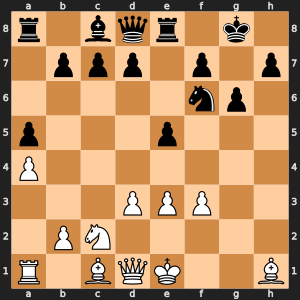

Move: 35: f6d5: -7.995543479919434


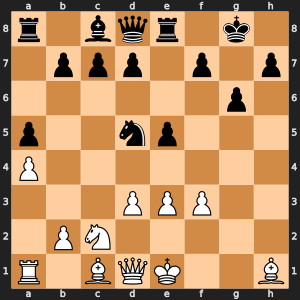

Move: 36: a1b1: -11.317221641540527


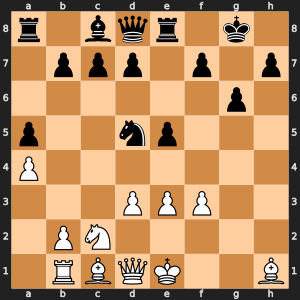

Move: 37: d8h4: -14.838006019592285


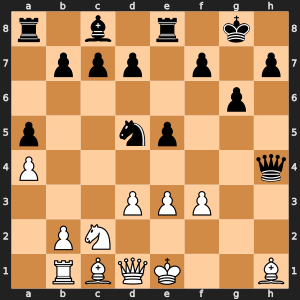

Move: 38: e1e2: -18.604738235473633


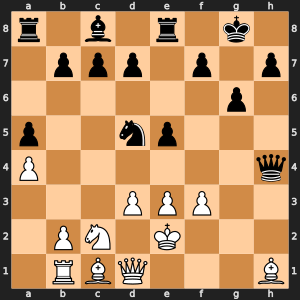

Move: 39: d5c3: -14.338969230651855


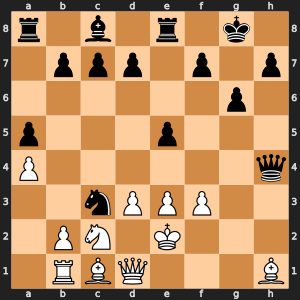

Move: 40: b2c3: -15.205694198608398


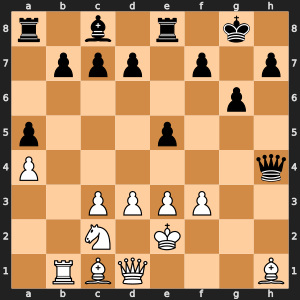

Move: 41: h4h2: -11.135396003723145


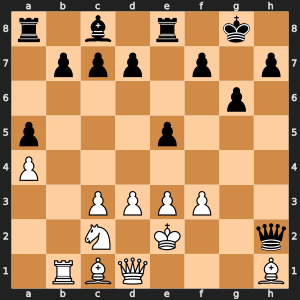

Move: 42: h1g2: -16.078577041625977


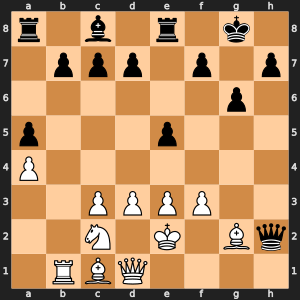

Move: 43: h2g2: -21.380687713623047


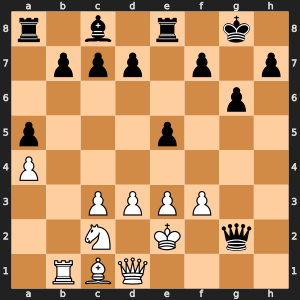

Move: 44: e2e1: -23.85695457458496


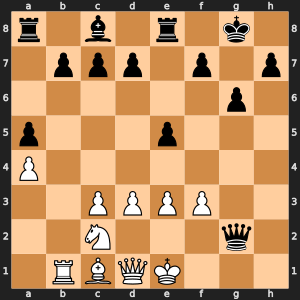

Move: 45: b7b6: -18.227510452270508


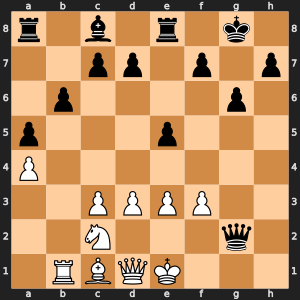

Move: 46: d1d2: -19.356399536132812


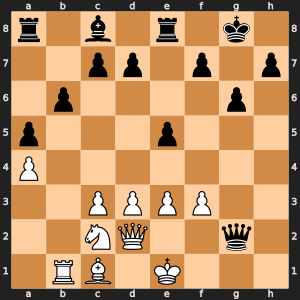

Move: 47: g2g1: -22.568984985351562


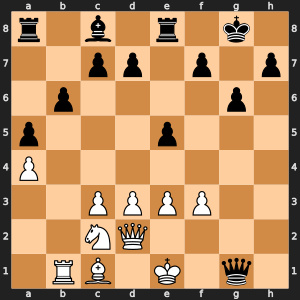

Move: 48: e1e2: -26.477258682250977


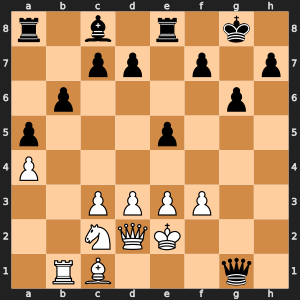

Move: 49: c8b7: -20.06195068359375


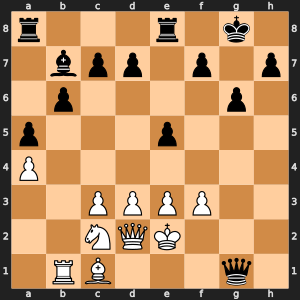

Move: 50: d2d1: -24.300830841064453


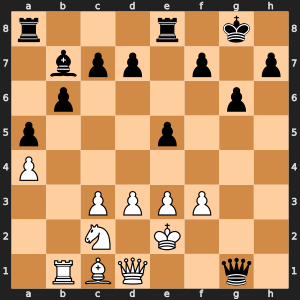

Move: 51: b7f3: -26.37104606628418


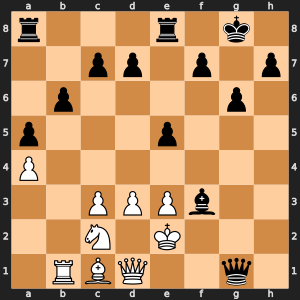

Move: 52: e2f3: -28.74129295349121


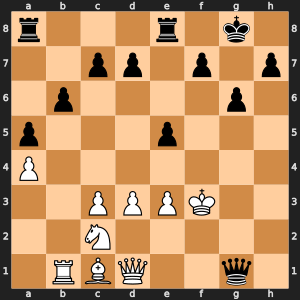

Move: 53: g1d1: -25.203386306762695


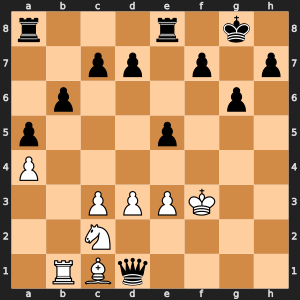

Move: 54: f3f2: -28.46254539489746


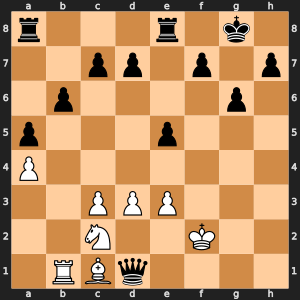

Move: 55: d1c2: -19.590303421020508


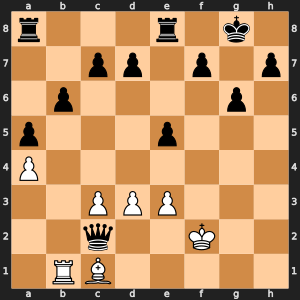

Move: 56: f2e1: -23.137691497802734


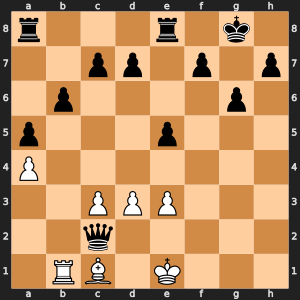

Move: 57: c2g2: -28.0154972076416


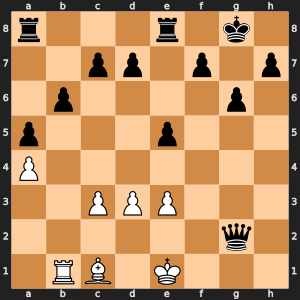

Move: 58: b1a1: -28.98101234436035


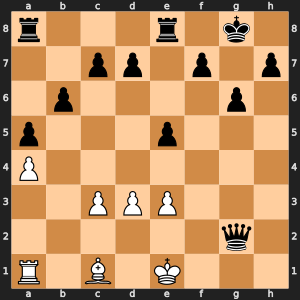

Move: 59: a8d8: -28.98101234436035


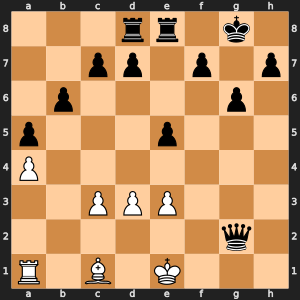

Move: 60: e3e4: -29.330930709838867


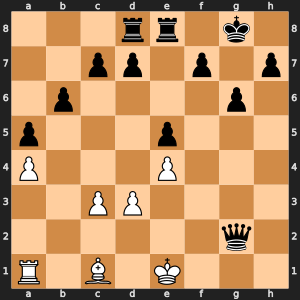

Move: 61: g2g1: -28.784740447998047


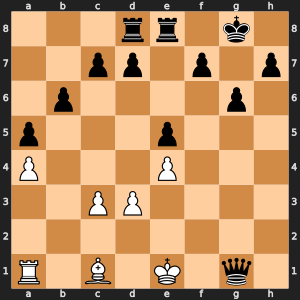

Move: 62: e1e2: -29.190271377563477


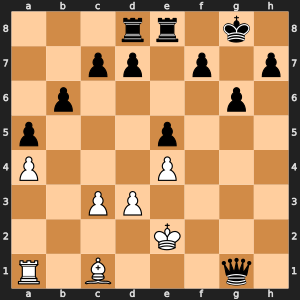

Move: 63: g1d1: -28.488208770751953


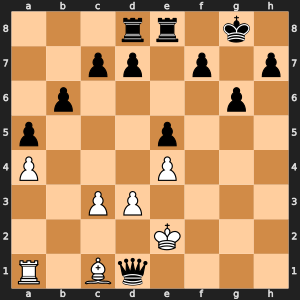

Move: 64: e2d1: -12.482115745544434


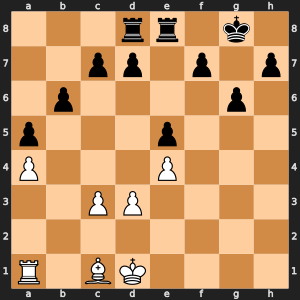

Move: 65: f7f5: -9.221492767333984


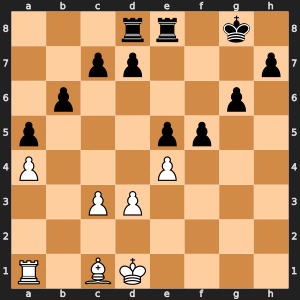

Move: 66: c1e3: -10.384858131408691


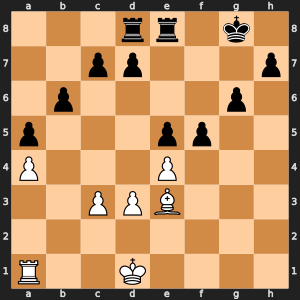

Move: 67: f5e4: -8.953131675720215


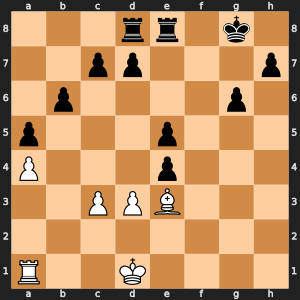

Move: 68: d3e4: -9.526471138000488


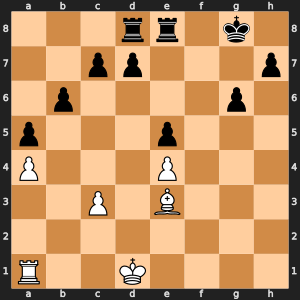

Move: 69: d8a8: -8.57529067993164


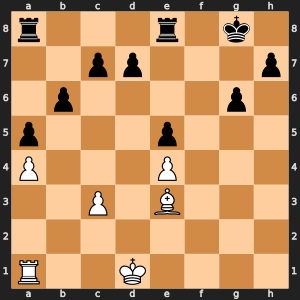

Move: 70: d1e1: -7.915788650512695


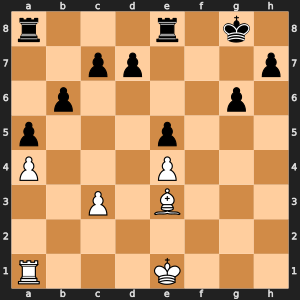

Move: 71: g6g5: -5.107312202453613


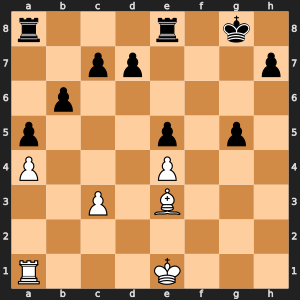

Move: 72: a1d1: -5.226973533630371


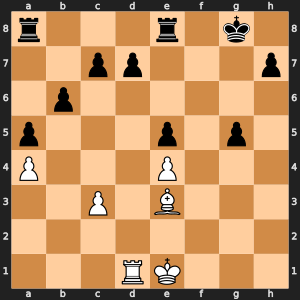

Move: 73: c7c6: -5.226973533630371


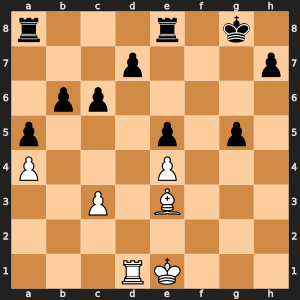

Move: 74: e3f2: -5.258573532104492


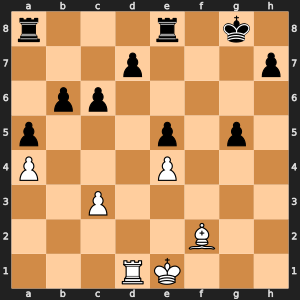

Move: 75: a8b8: -5.226973533630371


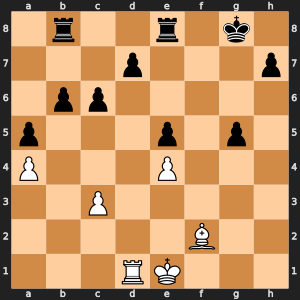

Move: 76: f2e3: -5.258573532104492


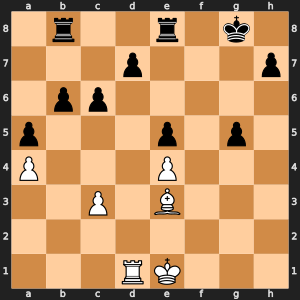

Move: 77: b8a8: -5.226973533630371


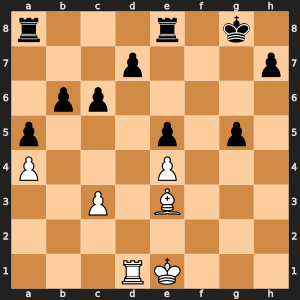

Move: 78: e3f2: -5.258573532104492


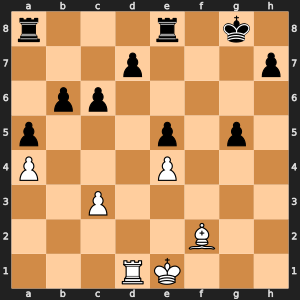

Move: 79: a8b8: -5.226973533630371


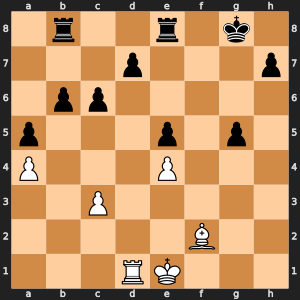

Move: 80: f2e3: -5.258573532104492


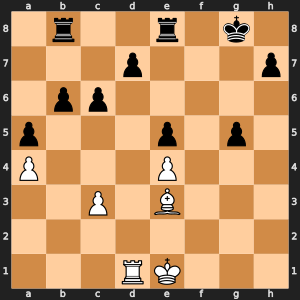

Move: 81: b8a8: -5.226973533630371


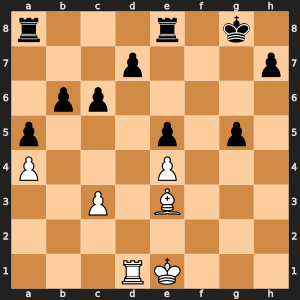

Move: 82: e3f2: -5.258573532104492


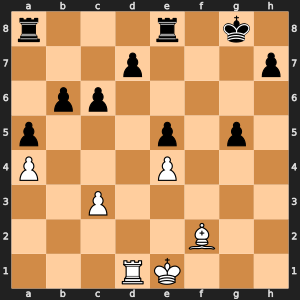

Move: 83: a8b8: -5.226973533630371


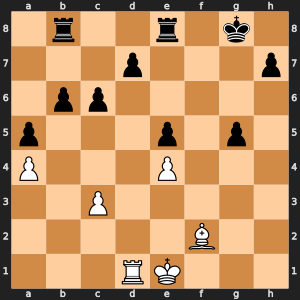

Move: 84: f2e3: -5.258573532104492


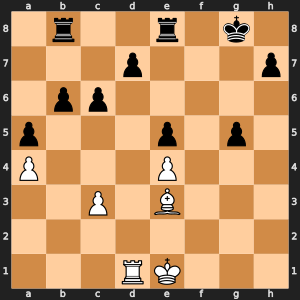

Move: 85: b8a8: -5.226973533630371


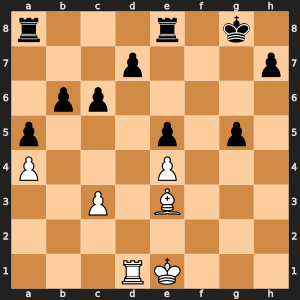

Move: 86: e3f2: -5.258573532104492


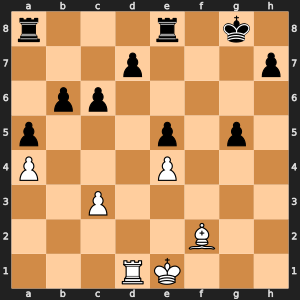

Move: 87: a8b8: -5.660619735717773


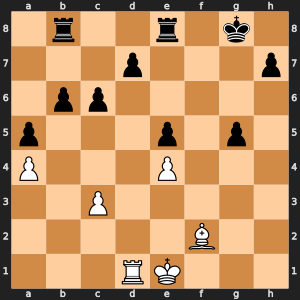

Move: 88: c3c4: -5.766348838806152


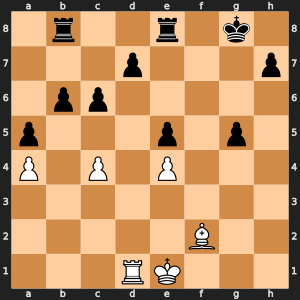

Move: 89: c6c5: -5.7109599113464355


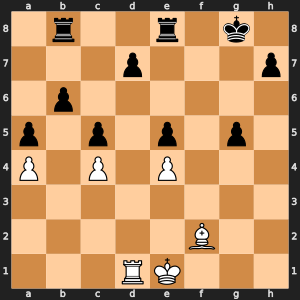

Move: 90: f2e3: -5.889485836029053


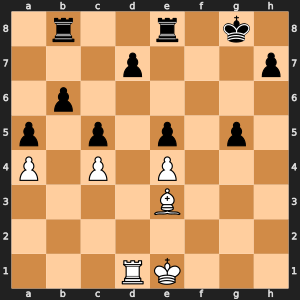

Move: 91: b8d8: -5.889485836029053


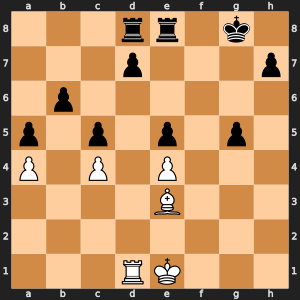

Move: 92: e3f2: -6.479183197021484


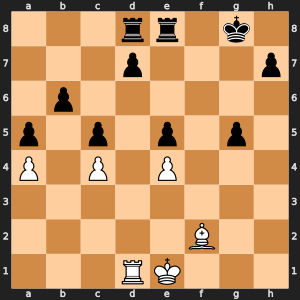

Move: 93: e8f8: -7.289287090301514


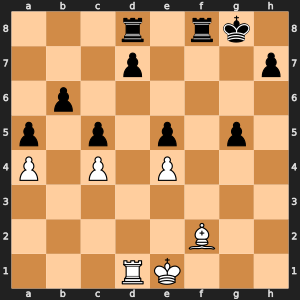

Move: 94: d1a1: -8.045297622680664


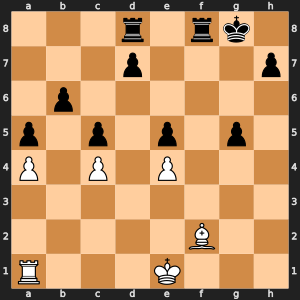

Move: 95: f8f2: -6.516426086425781


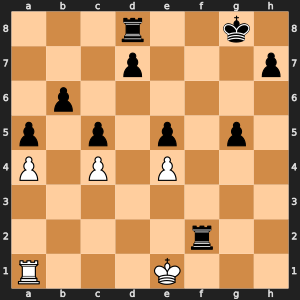

Move: 96: e1f2: -6.516426086425781


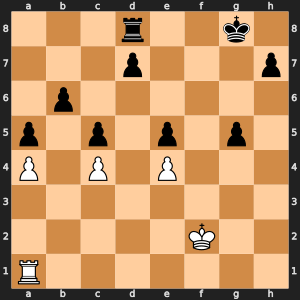

Move: 97: d8a8: -4.179500579833984


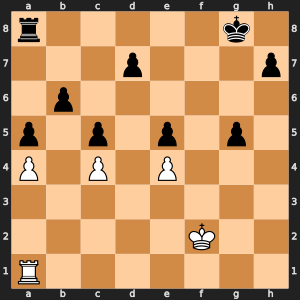

Move: 98: a1e1: -4.179500579833984


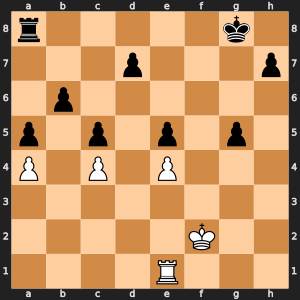

Move: 99: a8b8: -4.179500579833984


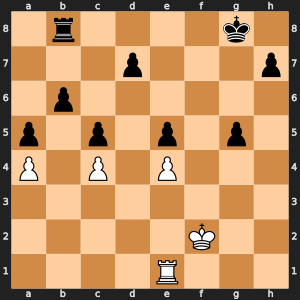

Move: 100: f2f1: -4.179500579833984


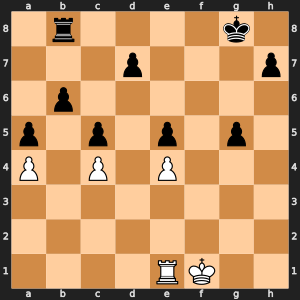

Move: 101: b8a8: -4.179500579833984


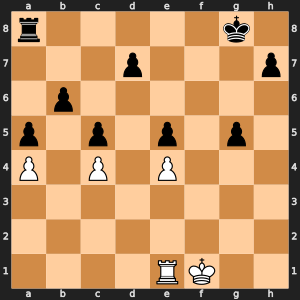

Move: 102: f1f2: -4.179500579833984


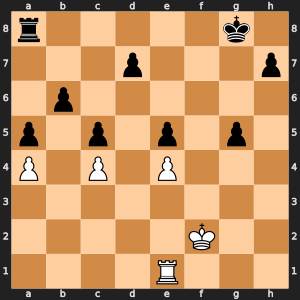

Move: 103: a8b8: -4.179500579833984


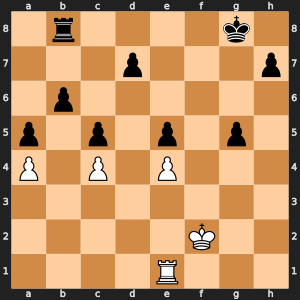

Move: 104: f2f1: -4.179500579833984


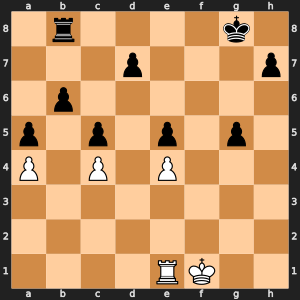

Move: 105: b8a8: -4.179500579833984


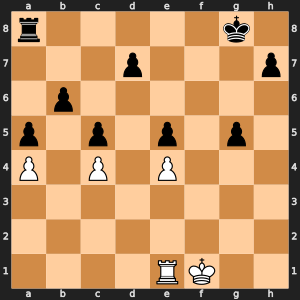

Move: 106: f1f2: -4.179500579833984


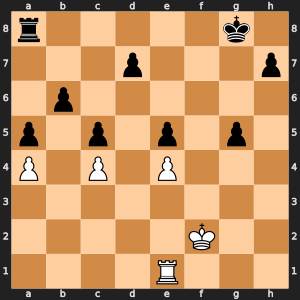

Move: 107: a8b8: -4.179500579833984


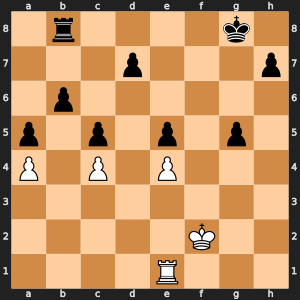

Move: 108: f2f1: -4.179500579833984


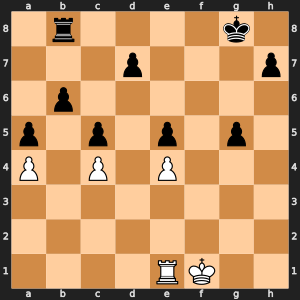

Move: 109: b8a8: -4.179500579833984


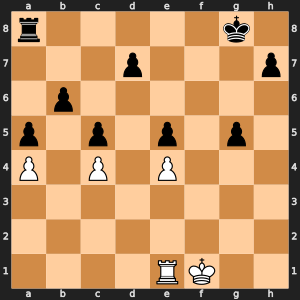

Move: 110: f1f2: -4.179500579833984


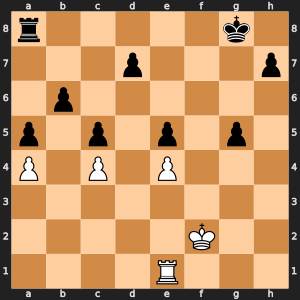

Move: 111: a8b8: -4.179500579833984


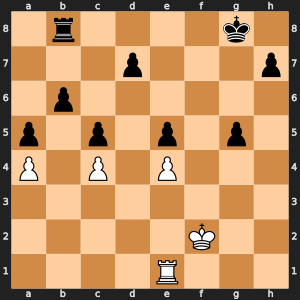

Move: 112: f2f1: -4.179500579833984


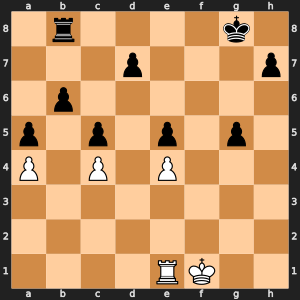

Move: 113: b8a8: -4.179500579833984


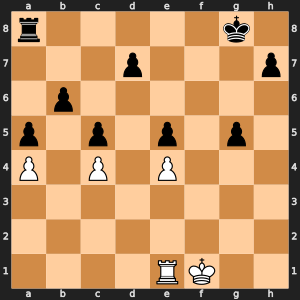

Move: 114: f1g2: -4.179500579833984


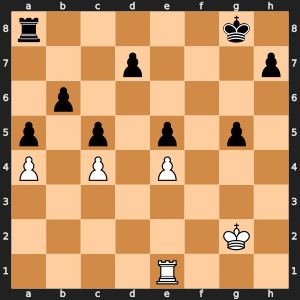

Move: 115: a8b8: -4.179500579833984


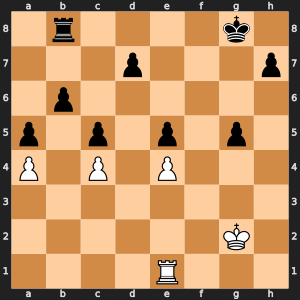

Move: 116: g2h1: -4.179500579833984


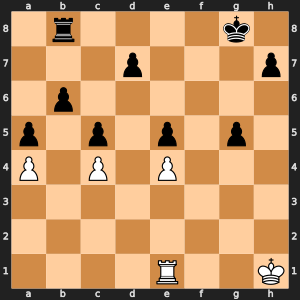

Move: 117: b8a8: -4.179500579833984


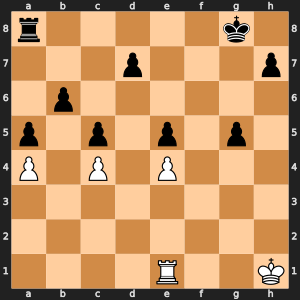

Move: 118: h1g2: -4.179500579833984


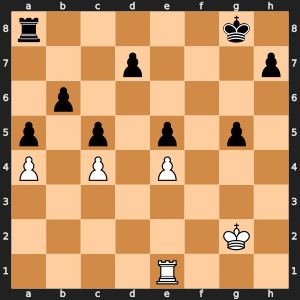

Move: 119: a8b8: -4.179500579833984


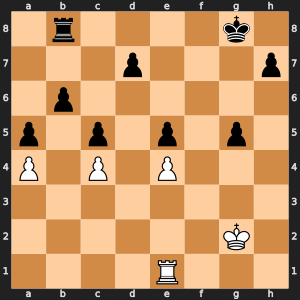

Move: 120: g2h1: -4.179500579833984


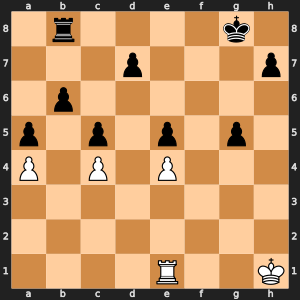

Move: 121: b8a8: -4.179500579833984


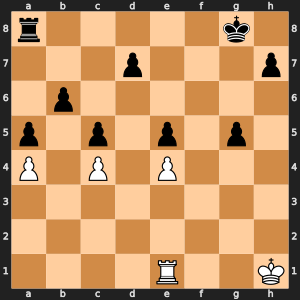

Move: 122: h1g2: -4.179500579833984


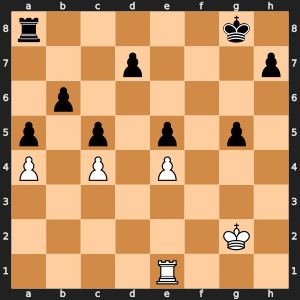

Move: 123: a8b8: -4.179500579833984


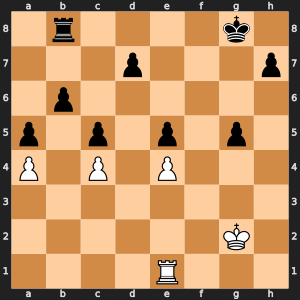

Move: 124: g2h1: -4.179500579833984


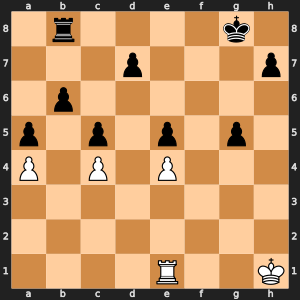

Move: 125: b8a8: -4.179500579833984


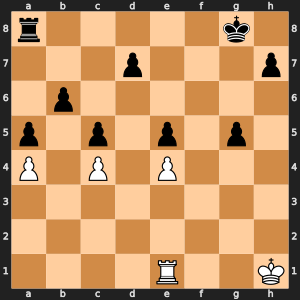

Move: 126: h1g2: -4.179500579833984


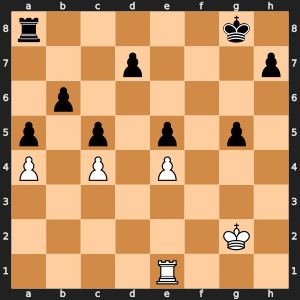

Move: 127: a8b8: -4.179500579833984


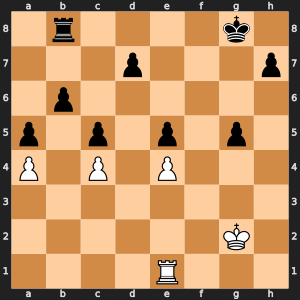

Move: 128: g2h1: -4.179500579833984


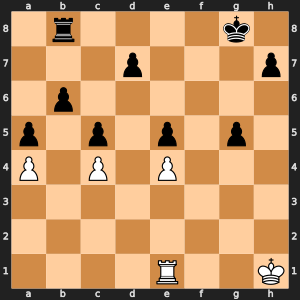

Move: 129: b8f8: -5.745232582092285


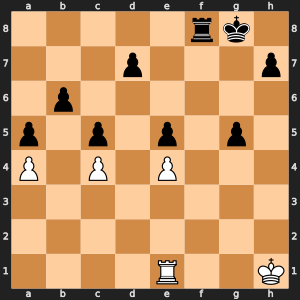

Move: 130: e1d1: -5.745232582092285


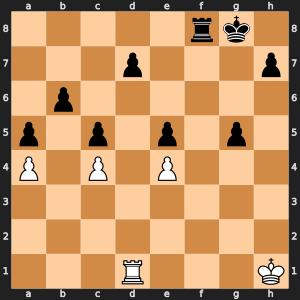

Move: 131: f8f2: -6.444910049438477


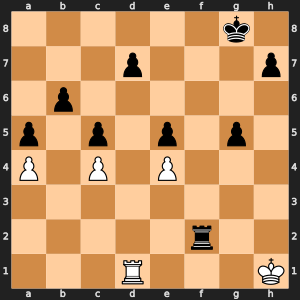

Move: 132: d1e1: -6.493907928466797


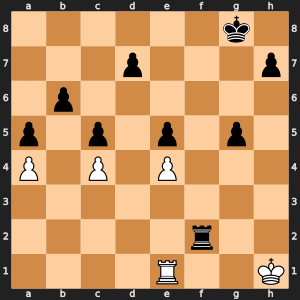

Move: 133: f2d2: -6.4319539070129395


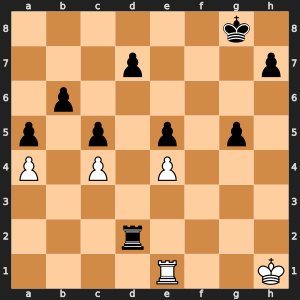

Move: 134: e1a1: -7.709811687469482


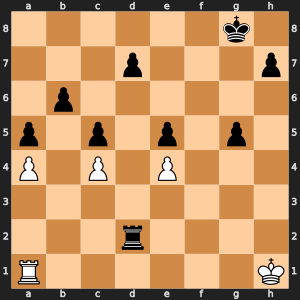

Move: 135: d2e2: -6.557936668395996


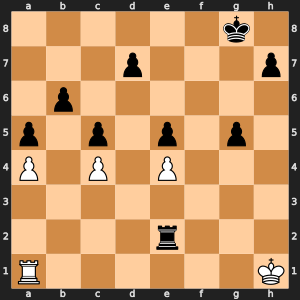

Move: 136: a1d1: -7.898553848266602


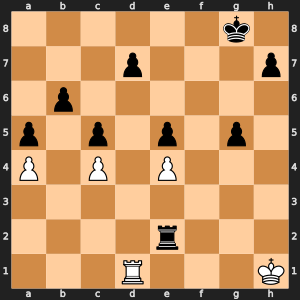

Move: 137: e2f2: -6.444910049438477


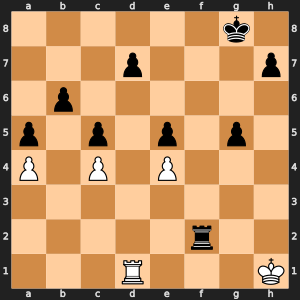

Move: 138: d1e1: -6.493907928466797


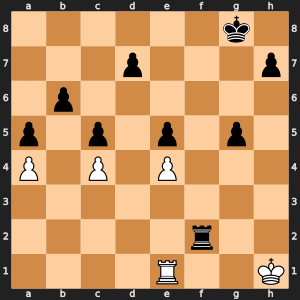

Move: 139: f2d2: -6.4319539070129395


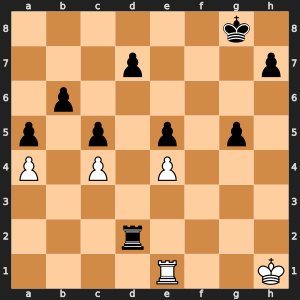

Move: 140: e1a1: -7.709811687469482


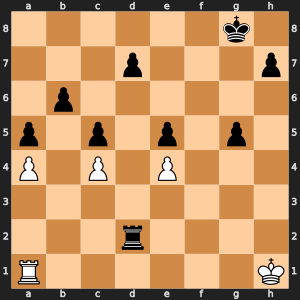

Move: 141: d2e2: -6.557936668395996


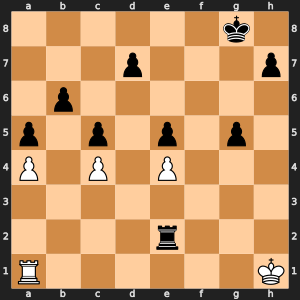

Move: 142: a1d1: -7.898553848266602


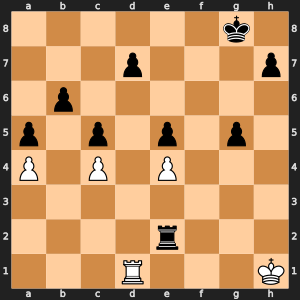

Move: 143: e2f2: -6.444910049438477


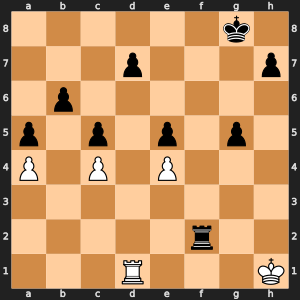

Move: 144: d1e1: -6.493907928466797


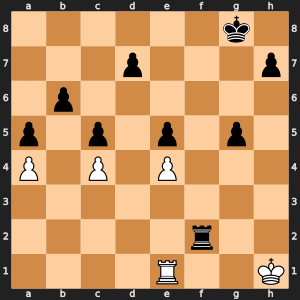

Move: 145: f2d2: -6.4319539070129395


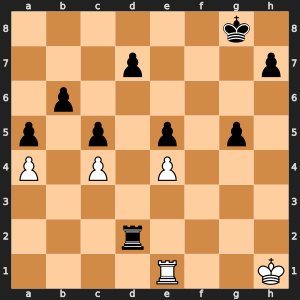

Move: 146: e1a1: -7.709811687469482


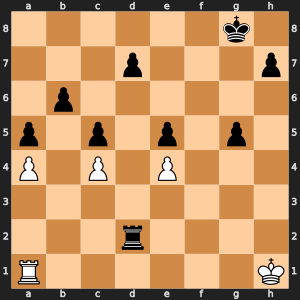

Move: 147: d2e2: -6.557936668395996


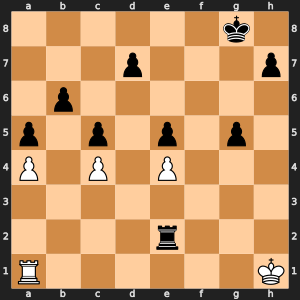

Move: 148: a1d1: -7.898553848266602


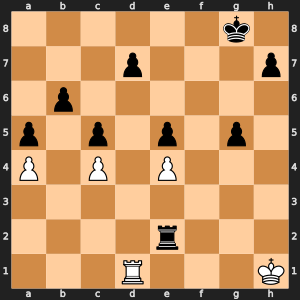

Move: 149: e2f2: -6.444910049438477


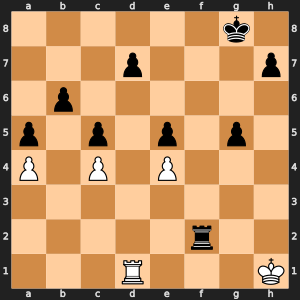

Move: 150: d1e1: -6.493907928466797


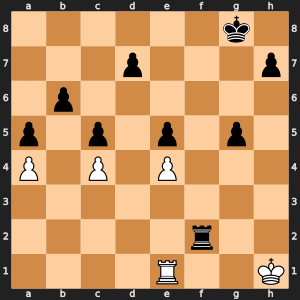

Move: 151: f2d2: -6.4319539070129395


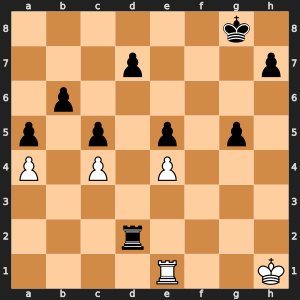

Move: 152: e1a1: -7.709811687469482


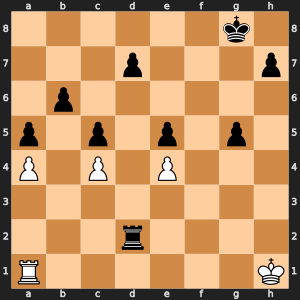

Move: 153: d2e2: -6.557936668395996


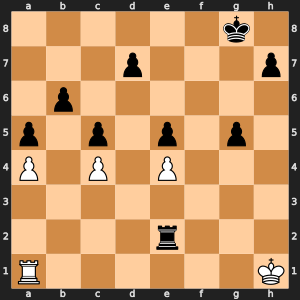

Move: 154: a1d1: -7.898553848266602


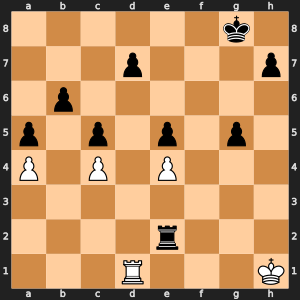

Move: 155: d7d6: -6.342665195465088


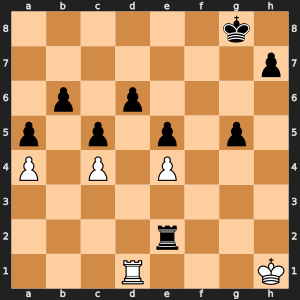

Move: 156: d1a1: -8.523055076599121


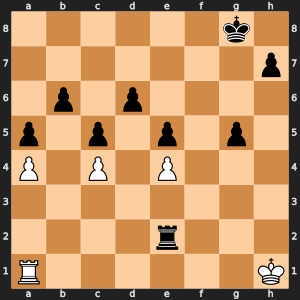

Move: 157: g5g4: -6.287564754486084


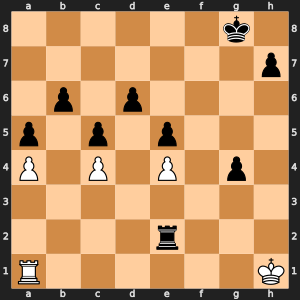

Move: 158: a1d1: -7.59421443939209


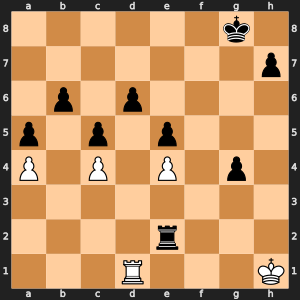

Move: 159: g4g3: -6.664429187774658


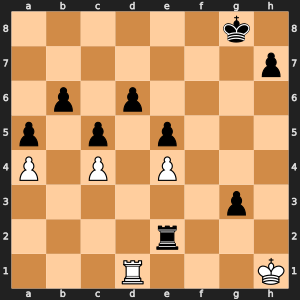

Move: 160: d1a1: -8.649685859680176


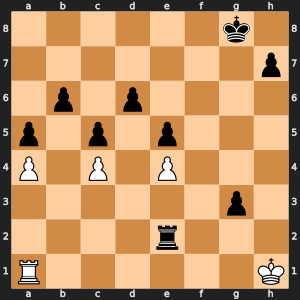

Move: 161: e2b2: -10.258456230163574


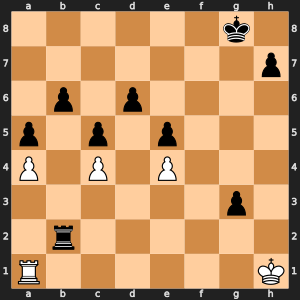

Move: 162: a1e1: -7.365888595581055


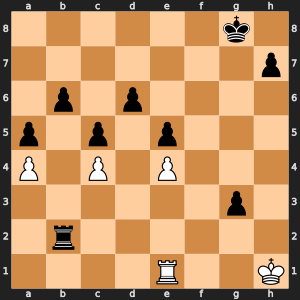

Move: 163: b2a2: -5.760763168334961


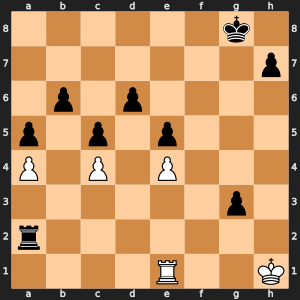

Move: 164: h1g1: -7.472348213195801


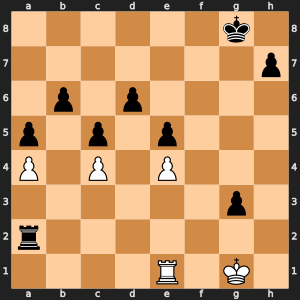

Move: 165: a2h2: -6.664429187774658


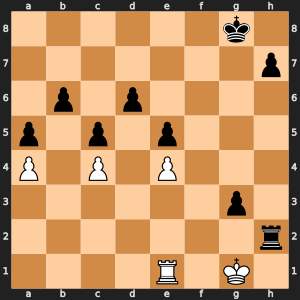

Move: 166: e1d1: -7.637785911560059


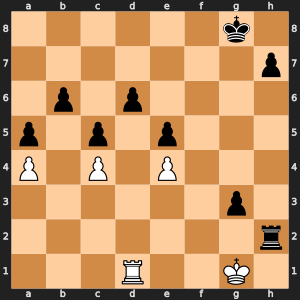

Move: 167: h2f2: -5.760763168334961


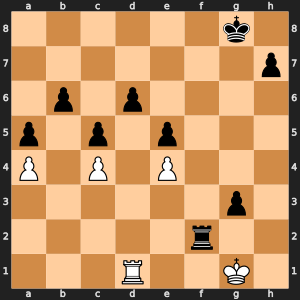

Move: 168: d1e1: -7.472348213195801


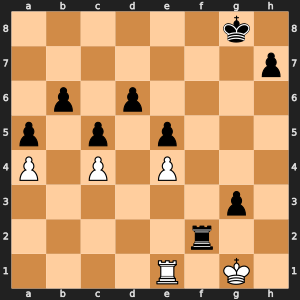

Move: 169: f2h2: -6.664429187774658


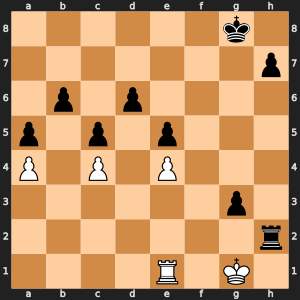

Move: 170: e1d1: -7.637785911560059


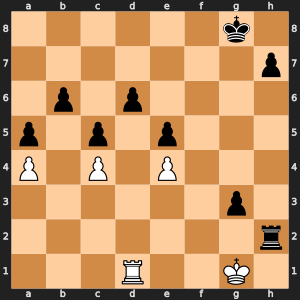

Move: 171: h2f2: -5.760763168334961


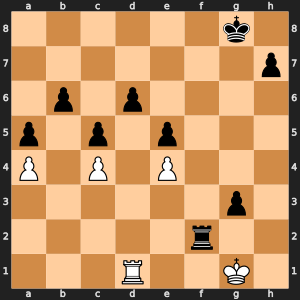

Move: 172: d1e1: -7.472348213195801


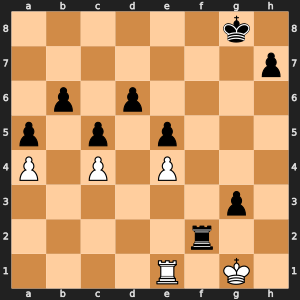

Move: 173: f2h2: -6.664429187774658


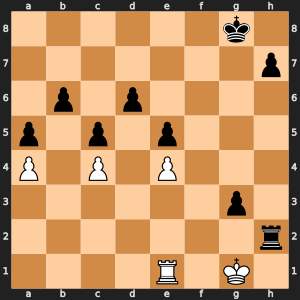

Move: 174: e1d1: -7.637785911560059


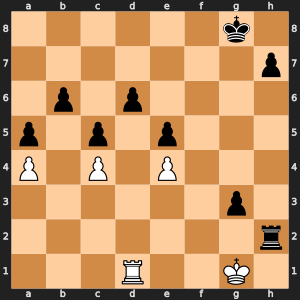

Move: 175: h2f2: -5.760763168334961


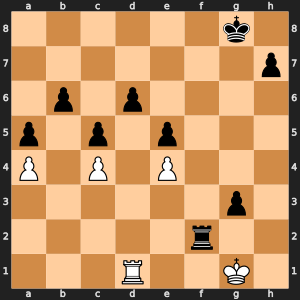

Move: 176: d1e1: -7.472348213195801


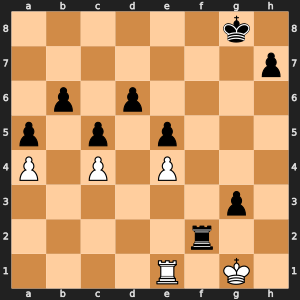

Move: 177: f2h2: -6.664429187774658


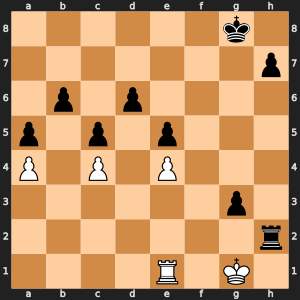

Move: 178: e1d1: -7.637785911560059


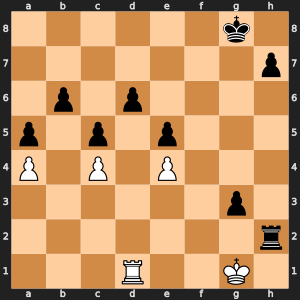

Move: 179: h2f2: -5.760763168334961


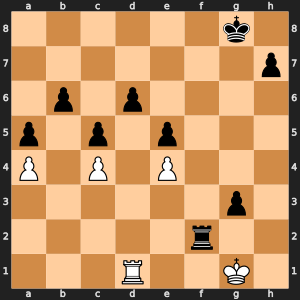

Move: 180: d1e1: -7.472348213195801


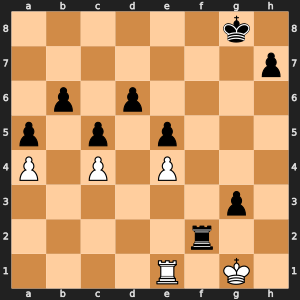

Move: 181: f2a2: -5.760763168334961


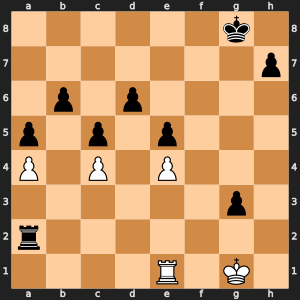

Move: 182: g1f1: -6.320545196533203


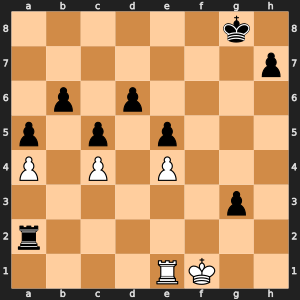

Move: 183: a2b2: -5.760763168334961


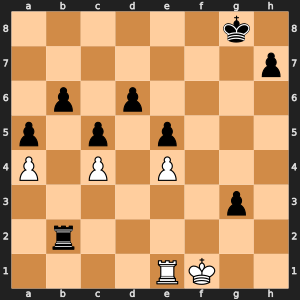

Move: 184: f1g1: -7.472348213195801


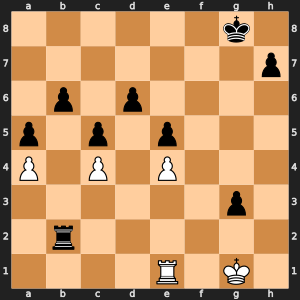

Move: 185: b2a2: -5.760763168334961


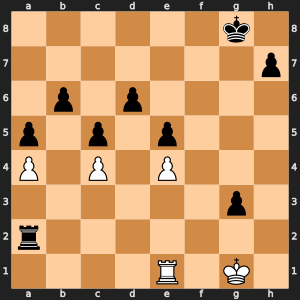

Move: 186: g1f1: -6.320545196533203


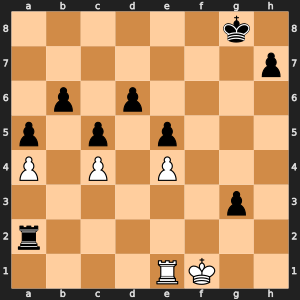

Move: 187: a2b2: -5.760763168334961


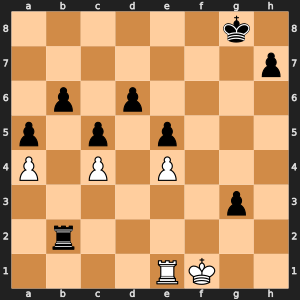

Move: 188: f1g1: -7.472348213195801


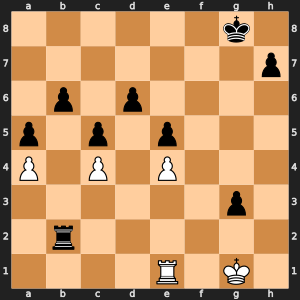

Move: 189: b2a2: -5.760763168334961


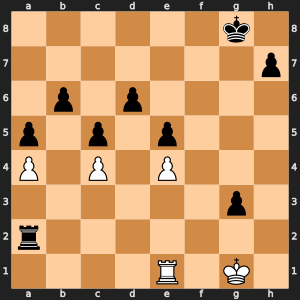

Move: 190: g1f1: -6.320545196533203


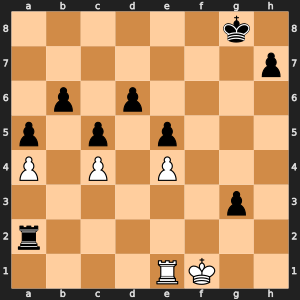

Move: 191: a2b2: -5.760763168334961


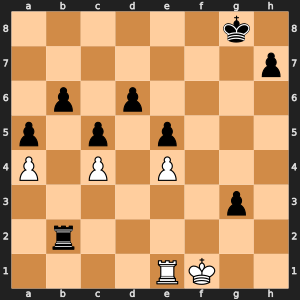

Move: 192: f1g1: -7.472348213195801


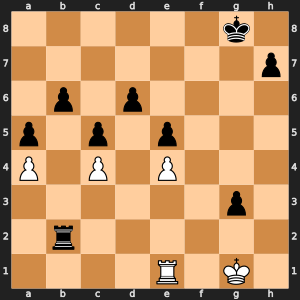

Move: 193: b2a2: -5.760763168334961


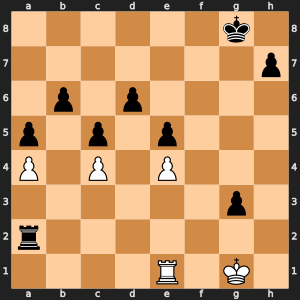

Move: 194: g1f1: -6.320545196533203


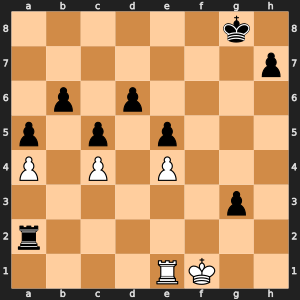

Move: 195: a2b2: -5.760763168334961


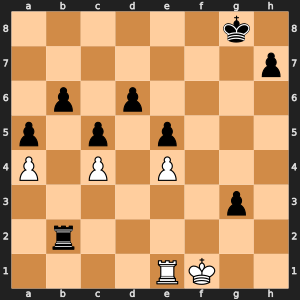

Move: 196: f1g1: -7.472348213195801


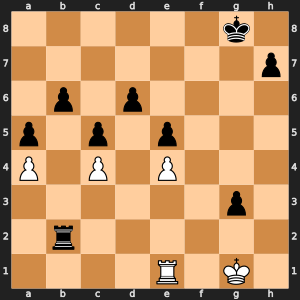

Move: 197: b2c2: -5.760763168334961


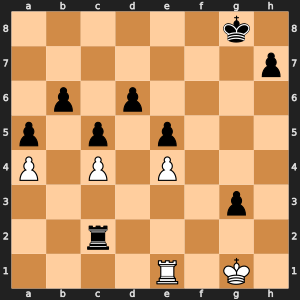

Move: 198: g1f1: -6.320545196533203


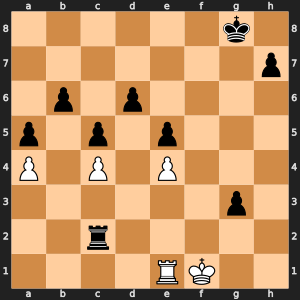

Move: 199: c2b2: -5.957718849182129


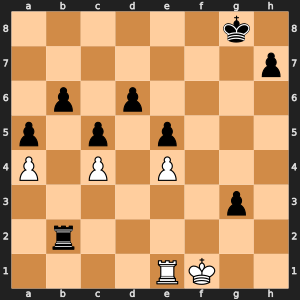

Game Over
Result:  1/2-1/2
[Event "?"]
[Site "?"]
[Date "????.??.??"]
[Round "?"]
[White "?"]
[Black "?"]
[Result "1/2-1/2"]

1. Nf3 Nf6 2. a4 a5 3. Nc3 g6 4. d3 e6 5. e3 Nc6 6. h4 Nb4 7. Nd4 Nxc2+ 8. Nxc2 Be7 9. f3 O-O 10. Rg1 Re8 11. Nd4 e5 12. Nc2 Nh5 13. Nd5 Bxh4+ 14. g3 Bxg3+ 15. Rxg3 Nxg3 16. Bg2 Ne4 17. Nf6+ Nxf6 18. Bh1 Nd5 19. Rb1 Qh4+ 20. Ke2 Nc3+ 21. bxc3 Qh2+ 22. Bg2 Qxg2+ 23. Ke1 b6 24. Qd2 Qg1+ 25. Ke2 Bb7 26. Qd1 Bxf3+ 27. Kxf3 Qxd1+ 28. Kf2 Qxc2+ 29. Ke1 Qg2 30. Ra1 Rad8 31. e4 Qg1+ 32. Ke2 Qd1+ 33. Kxd1 f5 34. Be3 fxe4 35. dxe4 Ra8 36. Ke1 g5 37. Rd1 c6 38. Bf2 Rab8 39. Be3 Ra8 40. Bf2 Rab8 41. Be3 Ra8 42. Bf2 Rab8 43. Be3 Ra8 44. Bf2 Rab8 45. c4 c5 46. Be3 Rbd8 47. Bf2 Rf8 48. Ra1 Rxf2 49. Kxf2 Ra8 50. Re1 Rb8 51. Kf1 Ra8 52. Kf2 Rb8 53. Kf1 Ra8 54. Kf2 Rb8 55. Kf1 Ra8 56. Kf2 Rb8 57. Kf1 Ra8 58. Kg2 Rb8 59. Kh1 Ra8 60. Kg2 Rb8 61. Kh1 Ra8 62. Kg2 Rb8 63. Kh1 Ra8 64. Kg2 Rb8 65. Kh1 Rf8 66. Rd1 Rf2 67. Re1 Rd2 68. Ra1 Re2 69. Rd1 Rf2 70. Re1 Rd2 71. Ra1 Re2 72. Rd1 Rf

In [85]:
import chess
import chess.svg
import torch
import torch.nn as nn
from IPython.display import SVG, display

# Check if GPU is available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device="cpu"

# Define a function to convert the board state into a format suitable for input to the neural network
def preprocess_board_state(board):
    board_state = [(((board.piece_at(square).piece_type * (1 if board.piece_at(square).color else -1))) if board.piece_at(square) is not None else 0) for square in chess.SQUARES]
    return torch.tensor(board_state, dtype=torch.float32).to(device)

# Define a function to generate legal moves for the current player
def generate_legal_moves(board):
    legal_moves = []
    for move in board.legal_moves:
        legal_moves.append(move)
    return legal_moves

# Minimax with alpha-beta pruning
def minimax(board, depth, alpha, beta, maximizing_player, model):
    if depth == 0 or board.is_game_over():
        if board.is_checkmate():
            if board.turn == chess.WHITE:
                return 1000, None
            else:
                return -1000, None
        return model(preprocess_board_state(board)).item(), None

    if maximizing_player:
        max_eval = float('-inf')
        best_move = None
        for move in generate_legal_moves(board):
            board.push(move)
            if board.is_checkmate():
                board.pop()
                return 1000, move  # indicating a winning position
            eval, _ = minimax(board, depth - 1, alpha, beta, False, model)
            board.pop()
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:
                break
            if eval == max_eval:
                best_move = move
        return max_eval, best_move
    else:
        min_eval = float('inf')
        best_move = None
        for move in generate_legal_moves(board):
            board.push(move)
            if board.is_checkmate():
                board.pop()
                return -1000, move  # indicating a winning position
            eval, _ = minimax(board, depth - 1, alpha, beta, True, model)
            board.pop()
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta <= alpha:
                break
            if eval == min_eval:
                best_move = move
        return min_eval, best_move


# Define the play_game function
def play_game(model, max_depth):
    board = chess.Board()
    display(SVG(chess.svg.board(board=board, size=300)))
    moves = []
    i=0
    while not board.is_game_over() and i<100:
        if board.is_checkmate() or board.is_stalemate() or board.is_insufficient_material() or board.is_seventyfive_moves():
            print("Game Over")
            print("Result: ", board.result())
            return

        legal_moves = generate_legal_moves(board)
        if len(legal_moves) == 0:
            print("Game Over - No legal moves left")
            print("Result: ", board.result())
            return

        if board.turn == chess.WHITE:
            eval, best_move = minimax(board, max_depth, float('-inf'), float('inf'), True, model)
        else:
            eval, best_move = minimax(board, max_depth, float('-inf'), float('inf'), False, model)

        board.push(best_move)
        moves.append(best_move)
        print(f"Move: {i}: {best_move}: {eval}")
        i+=1
        # print("**************************************", "\n")
        display(SVG(chess.svg.board(board=board, size=300)))

    # Print the final result of the game
    print("Game Over")
    print("Result: ", board.result())
    print(generate_pgn(board, moves))  # Generate and print the PGN


# Example usage:
# Assuming 'model' is your trained neural network model
play_game(model.to(device), max_depth=4)  # Move the model to GPU if available and set max depth to desired value
